In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

df = pd.read_csv('heart_disease_data.csv', header = 0)

# Change categorical variable types
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['num'] = df['num'].astype('category')

x = np.array(df.iloc[:,0:10])
y = np.array(df['num'])

# Parameter grid for GridSearchCV
param_grid = [
    {
        'hidden_layer_sizes' : [(100, ), (5, 2), (15, )],
        #'activation' : ['identity', 'logistic', 'tanh', 'relu'],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        #'alpha' : [1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
        #'batch_size' : ['auto', 1, 10, 50, 100, 150, 200],
        #'learning_rate' : ['constant', 'invscaling', 'adaptive'],
        #'learning_rate_init' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
        #'power_t' : [0.1, 0.25, 0.5, 0.75, 1, 1.5, 2],
        #'max_iter' : [1, 10, 50, 100, 150, 200],
        #'shuffle' : [True, False],
        #'tol' : [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
        #'verbose' : [False, True],
        #'warm_start' : [False, True],
        #'momentum' : [0.1, 0.3, 0.5, 0.7, 0.9],
        #'nesterovs_momentum' : [True, False],
        #'early_stopping' : [False, True],
        #'validation_fraction' : [0.1, 0.3, 0.5, 0.7, 0.9],
        #'beta_1' : [0.1, 0.25, 0.5, 0.9, 0.999],
        #'beta_2' : [0.1, 0.25, 0.5, 0.9, 0.999],
        #'epsilon' : [1e-10, 1e-9, 1e-8, 1e-7, 1e-6],
        #'n_iter_no_change' : [1, 2, 5, 10, 20],
    },
    {
        'hidden_layer_sizes' : [(100, ), (5, 2), (15, )],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        'warm_start' : [True],
        'max_iter' : [1],
    },
]

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [3]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

# Standard Scaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
# Grid Search
clf_cv = GridSearchCV(MLPClassifier(), param_grid)
clf_cv.fit(x_train, y_train)

C:\Users\yxc20\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yxc20\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\yxc20\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\yxc20\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\yxc20\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     rando...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'hidden_layer_sizes': [(100,), (5, 2), (15,)],
                          'solver': ['lbfgs', 'sgd', 'adam']},
             

In [5]:
clf_cv.best_score_

0.7893333333333333

In [6]:
clf_cv.best_params_

{'hidden_layer_sizes': (100,),
 'max_iter': 1,
 'solver': 'lbfgs',
 'warm_start': True}

In [7]:
clf_cv.cv_results_

{'mean_fit_time': array([0.1566964 , 0.59939416, 0.61629327, 0.15288679, 0.36563206,
        0.39710458, 0.07208888, 0.33788824, 0.38187869, 0.00735855,
        0.00491254, 0.0058314 , 0.00423034, 0.00520436, 0.00395552,
        0.00356404, 0.00294415, 0.00418782]),
 'std_fit_time': array([5.77146370e-02, 2.20606714e-02, 7.65850415e-02, 5.23456961e-03,
        1.63339560e-02, 1.89067902e-02, 1.46901866e-02, 1.17073020e-02,
        2.12768097e-04, 6.73023287e-04, 3.04945803e-04, 7.61760664e-04,
        2.00726432e-03, 9.20768197e-04, 4.47737706e-05, 4.49478162e-04,
        5.28566814e-05, 1.24585433e-03]),
 'mean_score_time': array([0.00128214, 0.0013001 , 0.00162824, 0.00098451, 0.00092371,
        0.0009772 , 0.00101479, 0.0009772 , 0.00093929, 0.00075889,
        0.00082541, 0.00097632, 0.00101026, 0.00131281, 0.00130161,
        0.00099953, 0.00094668, 0.00134587]),
 'std_score_time': array([9.06905213e-04, 4.60075503e-04, 3.89665602e-04, 2.80817100e-05,
        1.93284138e-05, 1.80

In [8]:
clf = clf_cv.best_estimator_

In [9]:
# Repeat running the model for 20 times to get mean values
accuracy, precision, recall = list(), list(), list()

for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)
    
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(confusion_matrix(y_test, y_pred))

    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, pos_label = 1))
    recall.append(recall_score(y_test, y_pred, pos_label = 1))
    print(classification_report(y_test, y_pred))

print('accuracy = ', accuracy, end = '\n\n')
print('precision = ', precision, end = '\n\n')
print('recall = ', recall, end = '\n\n')

print(np.array(accuracy).mean(), np.array(precision).mean(), np.array(recall).mean())

[[83 20]
 [21 62]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       103
           1       0.76      0.75      0.75        83

    accuracy                           0.78       186
   macro avg       0.78      0.78      0.78       186
weighted avg       0.78      0.78      0.78       186

[[91 12]
 [32 51]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       103
           1       0.81      0.61      0.70        83

    accuracy                           0.76       186
   macro avg       0.77      0.75      0.75       186
weighted avg       0.77      0.76      0.76       186

[[88 15]
 [19 64]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       103
           1       0.81      0.77      0.79        83

    accuracy                           0.82       186
   macro avg       0.82      0.81      0.81       186
weighted avg     

In [10]:
# Now for an example: let random_state be 47
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 47)
    
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        92
           1       0.90      0.73      0.81        94

    accuracy                           0.82       186
   macro avg       0.83      0.82      0.82       186
weighted avg       0.83      0.82      0.82       186



In [23]:
clf.coefs_

[array([[-1.88913515e-02,  9.70482477e-02,  1.39386204e-01,
         -2.17888580e-01,  1.60068753e-01,  1.68534231e-01,
         -1.05467289e-01,  1.68908352e-01, -1.55026183e-01,
          2.59307504e-02, -2.12837032e-01,  2.10237509e-01,
          1.50598745e-01, -1.13032679e-01, -2.10712453e-01,
          1.08933029e-02,  7.27833566e-02, -5.47416565e-03,
         -1.69441669e-01,  1.06458499e-01,  5.11060799e-02,
         -2.55214219e-01, -8.46699834e-02, -3.52551936e-02,
         -8.31088225e-02, -1.87131885e-02,  1.99266762e-01,
         -1.20381764e-01, -1.28824504e-01,  5.51184231e-02,
         -1.37883504e-02,  7.31491208e-03, -6.17659499e-02,
          2.40852184e-01,  1.42016051e-01,  1.15671305e-01,
          6.36761805e-02, -1.59330176e-01, -2.66933002e-01,
         -1.60402760e-01,  2.63829982e-01,  1.89553953e-01,
          1.63414841e-02, -3.83188976e-02,  1.65699904e-01,
         -1.04180853e-02, -7.11445720e-02,  1.43974348e-01,
          6.88221725e-03, -1.49315214e-0

In [25]:
clf.intercepts_

[array([ 0.11004661, -0.18634062, -0.01834955, -0.05719914, -0.07755063,
         0.14052571, -0.184198  ,  0.0169797 ,  0.17833593,  0.05773014,
         0.08422094, -0.09137801,  0.07397835, -0.13169927, -0.1075868 ,
        -0.20502816, -0.27134188,  0.13619023, -0.13508906, -0.02374377,
         0.08685735,  0.11229606,  0.21313107, -0.25106764,  0.05517391,
         0.08724008,  0.11447087, -0.22078268, -0.01500762, -0.10085853,
         0.07192217,  0.24213061,  0.13966649, -0.01792033, -0.19169876,
        -0.20393097,  0.00676368,  0.03152912, -0.0219942 ,  0.17050425,
         0.2045119 , -0.04860191,  0.09050183, -0.02055368, -0.20883303,
        -0.02944513,  0.06942712, -0.21209382,  0.1443302 ,  0.09681573,
        -0.15667338, -0.17383106, -0.16945941, -0.12517706, -0.15789426,
        -0.04976068,  0.14386199, -0.06737019,  0.12454986, -0.05405328,
        -0.11529141, -0.20821021, -0.1716029 , -0.13227405, -0.18378542,
         0.16540026, -0.0447123 ,  0.07802259, -0.0

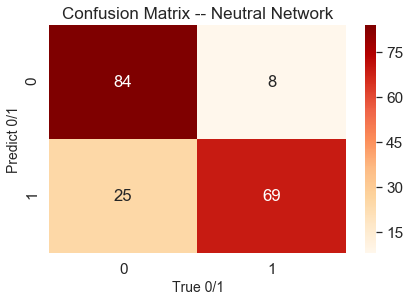

In [20]:
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)
    # create a heat map
    sns.set(font_scale = 1.4)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd', fmt = 'g')
    #ax.xaxis.set_label_position('bottom')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=17)
    plt.ylabel('Predict 0/1',fontsize=14)
    plt.xlabel('True 0/1',fontsize=14)
    plt.show()

plot_cnf_matirx(confusion_matrix(y_test, y_pred),'Confusion Matrix -- Neutral Network')

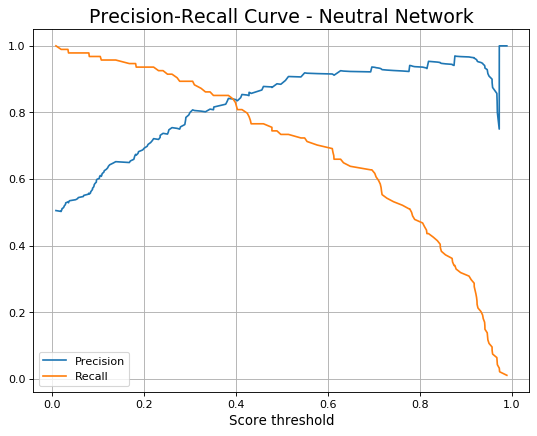

In [13]:
y_proba = clf.predict_proba(x_test)[:,1]

from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_test, y_proba)

def plot_pr_curve(precisions, recalls):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(thresholds, precisions[:-1], label = 'Precision')
    plt.plot(thresholds, recalls[:-1], label = 'Recall')
    plt.title('Precision-Recall Curve - Neutral Network',fontsize=17)
    #plt.ylabel('',fontsize=12)
    plt.xlabel('Score threshold',fontsize=12)
    plt.legend(loc = 'lower left')
    plt.grid()
    plt.show()    #没有从最小值开始取,sklearn自己从自己觉得ok的位置开始取

plot_pr_curve(precisions, recalls)

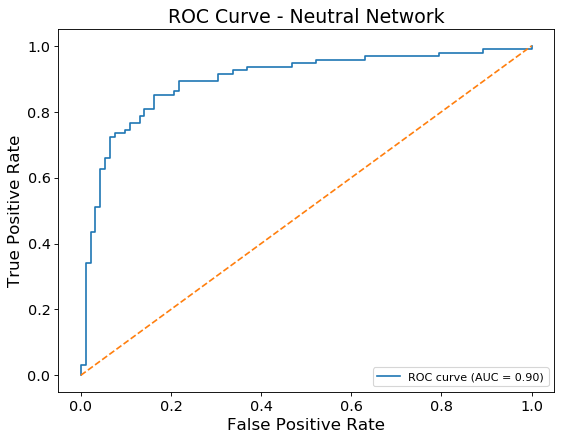

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs, tprs, label = 'ROC curve (AUC = %0.2f)' % auc(fprs, tprs))
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.title('ROC Curve - Neutral Network',fontsize=17)
    plt.legend(loc="lower right")
    plt.show()

fprs, tprs, thresholds = roc_curve(y_test,y_proba)
roc_auc_score(y_test, y_proba)
plot_roc_curve(fprs, tprs)

In [21]:
# References:
# Scikit-Learn documents, https://scikit-learn.org/
# Kaggle心脏病分类预测数据分析案例, CSDN, https://blog.csdn.net/noob_sufan/article/details/91980521